## Name: Aditya Vartak
#### Problem Statement : Implement CNN on fashion MNIST Data and Find out Max Validation accuracy . Find out test accuracy .Do some image augmentation  

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


Using TensorFlow backend.


In [0]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 42
#Model
NO_EPOCHS = 50
BATCH_SIZE = 32


In [4]:


train=pd.read_csv("/content/gdrive/My Drive/fashion-mnist_train.csv")
test=pd.read_csv("/content/gdrive/My Drive/fashion-mnist_test.csv")
print(train.shape,test.shape)

(60000, 785) (10000, 785)


In [0]:
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [6]:
X, y = data_preprocessing(train)
X_test, y_test = data_preprocessing(test)
print(X_test.shape,y_test.shape)

(10000, 28, 28, 1) (10000, 10)


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zca_whitening=True)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
datagen.fit(X_train)

In [10]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(256, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
model.add(Conv2D(256, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="Adam",
              metrics=['accuracy'])

W0723 04:11:42.197078 140268695451520 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 52s 35ms/step - loss: 1.0030 - acc: 0.6314
Epoch 2/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.6562 - acc: 0.7552
Epoch 3/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.5810 - acc: 0.7857
Epoch 4/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.5387 - acc: 0.8034
Epoch 5/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.5096 - acc: 0.8154
Epoch 6/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.4889 - acc: 0.8213
Epoch 7/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.4594 - acc: 0.8330
Epoch 8/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.4506 - acc: 0.8383
Epoch 9/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.4332 - acc: 0.8446
Epoch 10/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.4225 - acc: 0.8472


In [12]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


In [0]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       1

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
earlystop=EarlyStopping(monitor='val_loss', patience=3)

train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val),callbacks=[reduce_lr])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 22s 463us/sample - loss: 0.2858 - acc: 0.8955 - val_loss: 0.2627 - val_acc: 0.9118
Epoch 2/50
48000/48000 [==============================] - 22s 459us/sample - loss: 0.2374 - acc: 0.9150 - val_loss: 0.2471 - val_acc: 0.9098
Epoch 3/50
48000/48000 [==============================] - 22s 458us/sample - loss: 0.2177 - acc: 0.9219 - val_loss: 0.2280 - val_acc: 0.9197
Epoch 4/50
48000/48000 [==============================] - 22s 459us/sample - loss: 0.2021 - acc: 0.9274 - val_loss: 0.2018 - val_acc: 0.9300
Epoch 5/50
48000/48000 [==============================] - 22s 459us/sample - loss: 0.1862 - acc: 0.9334 - val_loss: 0.1996 - val_acc: 0.9328
Epoch 6/50
48000/48000 [==============================] - 22s 459us/sample - loss: 0.1751 - acc: 0.9380 - val_loss: 0.1997 - val_acc: 0.9324
Epoch 7/50
48000/48000 [==============================] - 22s 459us/sample - loss: 0.1622 - acc: 0.9421 

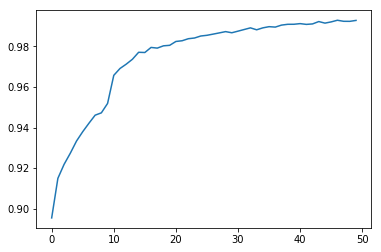

In [16]:
plt.plot(train_model.history['acc'])

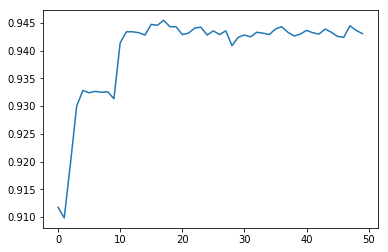

In [17]:
plt.plot(train_model.history['val_acc'])

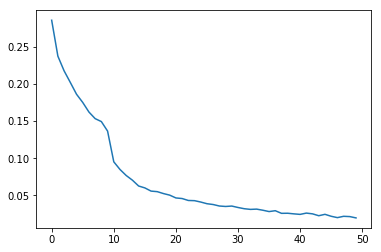

In [18]:
plt.plot(train_model.history['loss'])

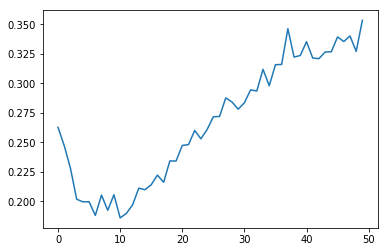

In [19]:
plt.plot(train_model.history['val_loss'])

In [20]:
predictions=model.predict_classes(X_test)
print(predictions.shape)

(10000,)


In [21]:
actual=np.argmax(y_test,axis=1)
print(actual.shape)

(10000,)


In [22]:
s=0
for i in range(10000):
  if(predictions[i]==actual[i]):
    s+=1

print(s)
print("Test Accuracy:",float(s/10000))

9463
Test Accuracy: 0.9463
